# Music Recommendation

## Import Module

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

#  Loading Dataset

In [18]:
song_df = pd.read_csv('data.csv.csv')
song_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [19]:
print(len(song_df))

170653


## Data Preprocessing 

In [24]:
# creating new feature combining title and artist name
song_df['song'] = song_df['name']+' - '+song_df['artists']
song_df.head()

C:\Users\MAHRUKH NISAR\AppData\Local\Temp\ipykernel_3028\987139251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_df['song'] = song_df['name']+' - '+song_df['artists']


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,song
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,"Piano Concerto No. 3 in D Minor, Op. 30: III. ..."
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,Clancy Lowered the Boom - ['Dennis Day']
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,Gati Bali - ['KHP Kridhamardawa Karaton Ngayog...
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,Danny Boy - ['Frank Parker']
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,When Irish Eyes Are Smiling - ['Phil Regan']


In [21]:
# taking top 10k samples for quick results
song_df = song_df.head(10000)

In [26]:
# cummulative sum of listen count of the songs
song_grouped = song_df.groupby(['song']).agg({'popularity':'count'}).reset_index()
song_grouped.head()

,song,popularity
0,"""A"" You're Adorable - ['Brian Hyland']",1
1,"""Jubel"" - Overture, Op. 59 - ['Carl Maria von ...",1
2,' Cello Song - ['Nick Drake'],1
3,"'A vucchella - ['Francesco Paolo Tosti', 'Mari...",1
4,'Cause I Feel Lowdown - ['Sophie Tucker'],1


In [30]:
song_df['popularity'].describe()

count    10000.000000
mean        23.527000
std         21.510689
min          0.000000
25%          4.000000
50%         16.000000
75%         43.000000
max         85.000000
Name: popularity, dtype: float64

In [27]:
grouped_sum = song_grouped['popularity'].sum()
song_grouped['percentage'] = (song_grouped['popularity'] / grouped_sum ) * 100
song_grouped.sort_values(['popularity', 'song'], ascending=[0,1])

,song,popularity,percentage
6096,Potato Head Blues - ['Louis Armstrong & His Ho...,6,0.06
2966,Heebie Jeebies - ['Louis Armstrong & His Hot F...,4,0.04
3968,Jazz Lips - ['Louis Armstrong & His Hot Five'],4,0.04
6484,"Saginaw, Michigan - ['Lefty Frizzell']",4,0.04
6594,Secret Love - ['Doris Day'],4,0.04
...,...,...,...
9405,說不出的快活 - ['葛蘭'],1,0.01
9406,郎如春日風 - ['張琍敏'],1,0.01
9407,魂縈舊夢 - ['白光'],1,0.01
9408,鳳凰于飛 - 二 - ['周璇'],1,0.01


## Popularity Recommendation Engine

D:\anacconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


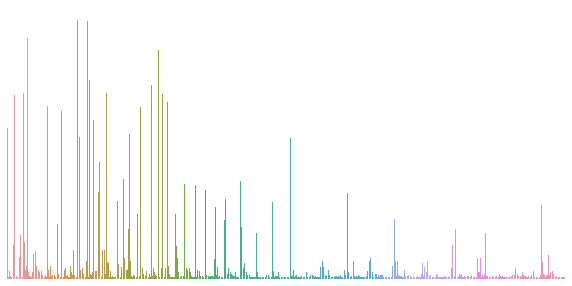

In [51]:
plt.figure(figsize = (10, 5))
sb.countplot(song_df['release_date'])
plt.axis('off')
plt.show()

In [52]:
floats = []
for col in song_df.columns:
  if song_df[col].dtype == 'float':
    floats.append(col)
 
len(floats)

9

In [55]:
def recommend_songs(song_name, data=song_df):
  # Base case
  if song_df[song_df['name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')
     
    for song in data.sample(n=5)['name'].values:
      print(song)
    return
   
  data['similarity_factor'] = get_similarities(song_name, data)
 
  data.sort_values(by=['similarity_factor', 'popularity'],
                   ascending = [False, False],
                   inplace=True)
   
  # First song will be the input song itself as the similarity will be highest.
  display(data[['name', 'artists']][2:7])


In [59]:
recommend_songs('"A" You are Adorable')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

Take Good Care Of My Baby
Часть 3.3 & Часть 4.1 - Прощай оружие
Часть 54.4 - Фиеста
Galletita - Remasterizado
Only the Lonely


In [60]:
recommend_songs('Omly the Lonely')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

All The Things You Are
Take Me To The Pilot
Munchkinland Insert - Alternate Tag
Eine kurze Weltgeschichte für junge Leser: Von den Anfängen bis zum Mittelalter, Kapitel 4
The Bonnie Blue Flag
